<a href="https://colab.research.google.com/github/StanleyLiangYork/2024_journal_club_Transformer_AI/blob/main/positional_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the demo notebook to implement the positional encoding method based on the sinusoidal and cosinusoidal function.

Positional encoding aims to assign a unique representation of an index to an entity in a sequence so that each position has unique representation. It should match the length (dimensionality) of the word embedding vector so that it can be concatenated to the embedding. It is defined by the following functions.

$P(k, 2i) = sin(\frac{k}{n^{2i/d}})$ <p>
$P(k, 2i+1) = cos(\frac{k}{n^{2i/d}})$ <p>
Where <p>

*   k - Position of an entity the in input sequence, $0 \leq k < L/2, L$ is the length of the sequence
*   d - Dimension of the output embedding space
*   $P(k,j)$: Position function for mapping a position k in the input sequence to index $(k,j)$ of the positional matrix
*   $n$ - User-defined scalar, set to 10000 by the authors of “Attention Is All You Need”
*   $i$: Used for mapping to column indices $0 \leq i < \frac{d}{2}$, with with a single value of $i$ maps to both sine and cosine functions

For example, to encode the phrase "I am a robot", we set $n=100$ and $d=4$ (the vocabulary has 4 words), The positional encoding matrix for this phrase is shown below.

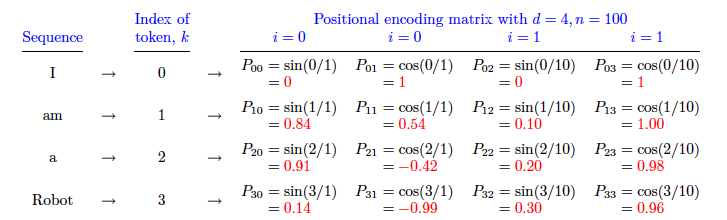







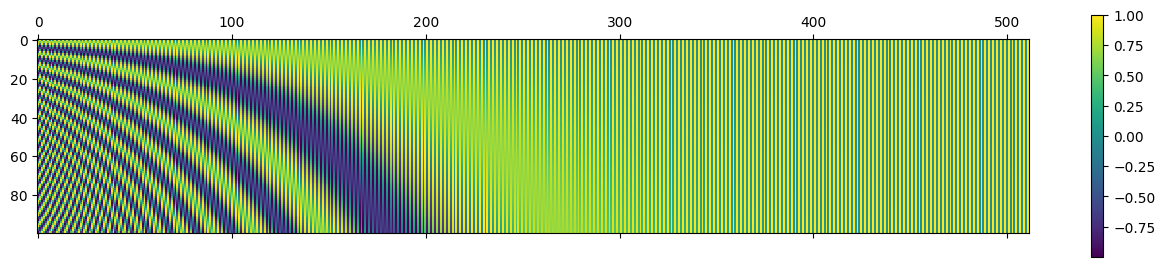

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    # seq_len is the length of the sequence
    # d is the dimensionality of the embedding vector
    # n is a value set by the user

    P = np.zeros((seq_len, d)) # we set an empty vector to load the position embedding
    # go through the whole sequence to fill the embedding
    for k in range(seq_len):
        # for each position, we use the sine function for the even positions and cosine function for the odd positions
        # so we only need to go through the half way to fill all the values
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.show()

# Take a closer look at the positional encoding matrix.
Let's check the sine wave for different positions with n = 10000 and d = 512.

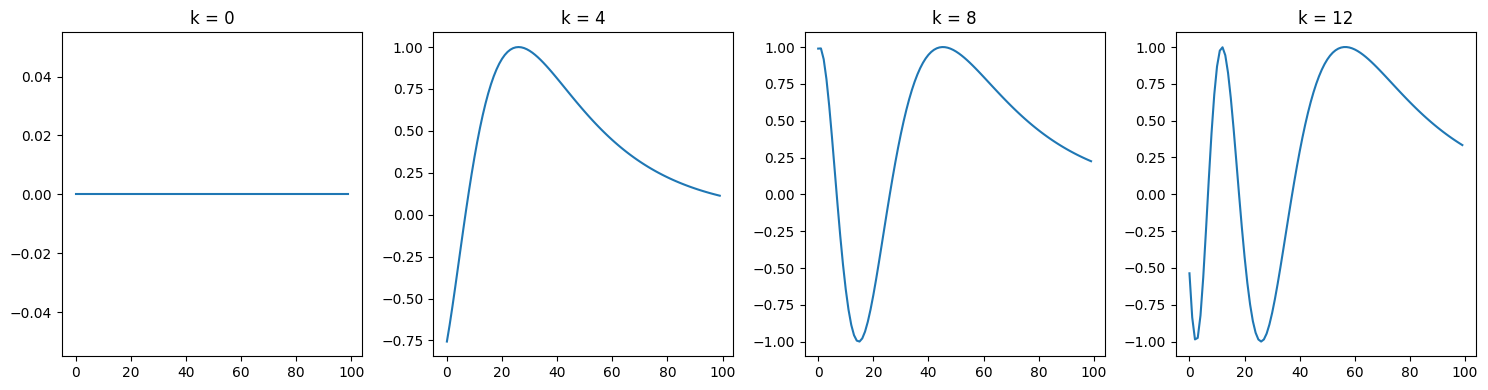

In [12]:
def plotSinusoid(k, d=512, n=10000):
    # the input sequence has the length of 100, embedded into a 512-dim vector space
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

fig = plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)
plt.tight_layout()
plt.show()

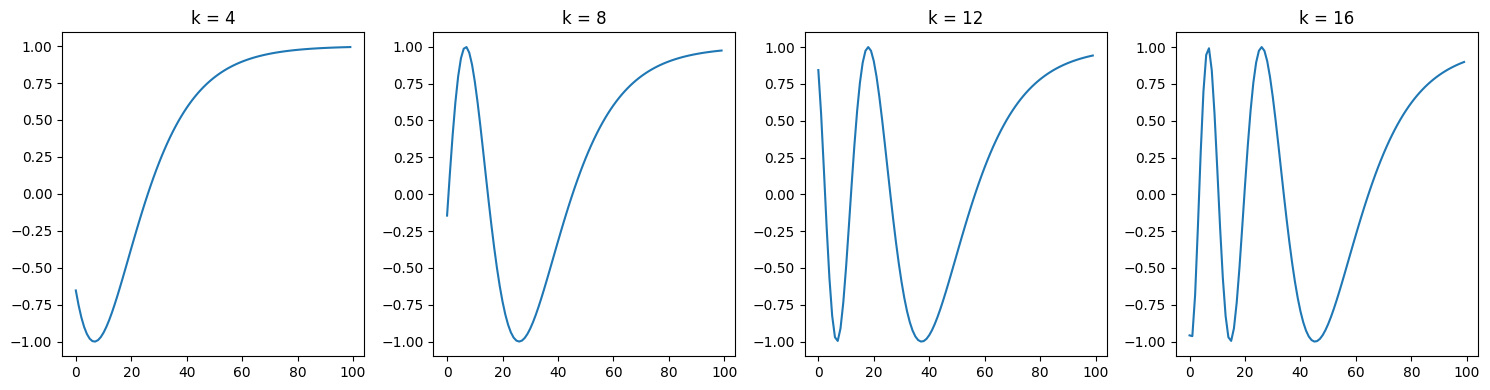

In [13]:
def plotCosinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.cos(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

fig = plt.figure(figsize=(15, 4))
for i in range(4):
    plt.subplot(141 + i)
    # we use consine function to encode odd positions
    plotCosinusoid((i+1)*4)
    plt.tight_layout()
plt.show()